In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, rcParams
from matplotlib import font_manager, rc
import csv
import re
import folium
import seaborn as sns
from pandas.io.json import json_normalize
import os
import webbrowser
import requests
import json
from folium import plugins

plt.rc('font', family='Malgun Gothic')

i = 0

x7 = []

x9 = []

x97 = []

rc = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
     '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

data = []

y7 = []

y_result7 = []

y9 = []

y_result9 = []

chai = []

popx = []

n = [i for i in range(25)]

f = pd.read_csv('C:/Users/student/Desktop/seoul_project/서울특별시 부동산 실거래가 정보.csv')

df = pd.DataFrame(f, columns = ['실거래가아이디', '지번코드', '시군구코드', '자치구명', '법정동코드', '법정동명', '신고년도', '업무구분코드', '업무구분', '신고일자', '물건번호', '대지권면적', '건물면적', '관리구분코드', '층정보', '건물주용도', '물건금액', '건축년도'])

data7 = df[df['신고년도'].isin([2017])]

data7 = data7[data7['건물주용도'].isin(['아파트'])]

data9 = df[df['신고년도'].isin([2019])]

data9 = data9[data9['건물주용도'].isin(['아파트'])]

chaip = []



C:\Users\student\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
for i in range(len(rc)):
    r7 = data7[data7['자치구명'].isin([rc[i]])]
    y7 = r7['물건금액']/r7['건물면적']
    y_result7.append(y7.mean())
    x7.append(rc[i])

In [3]:
for i in range(len(rc)):
    r9 = data9[data9['자치구명'].isin([rc[i]])]
    y9 = r9['물건금액']/r9['건물면적']
    y_result9.append(y9.mean())
    x9.append(rc[i])

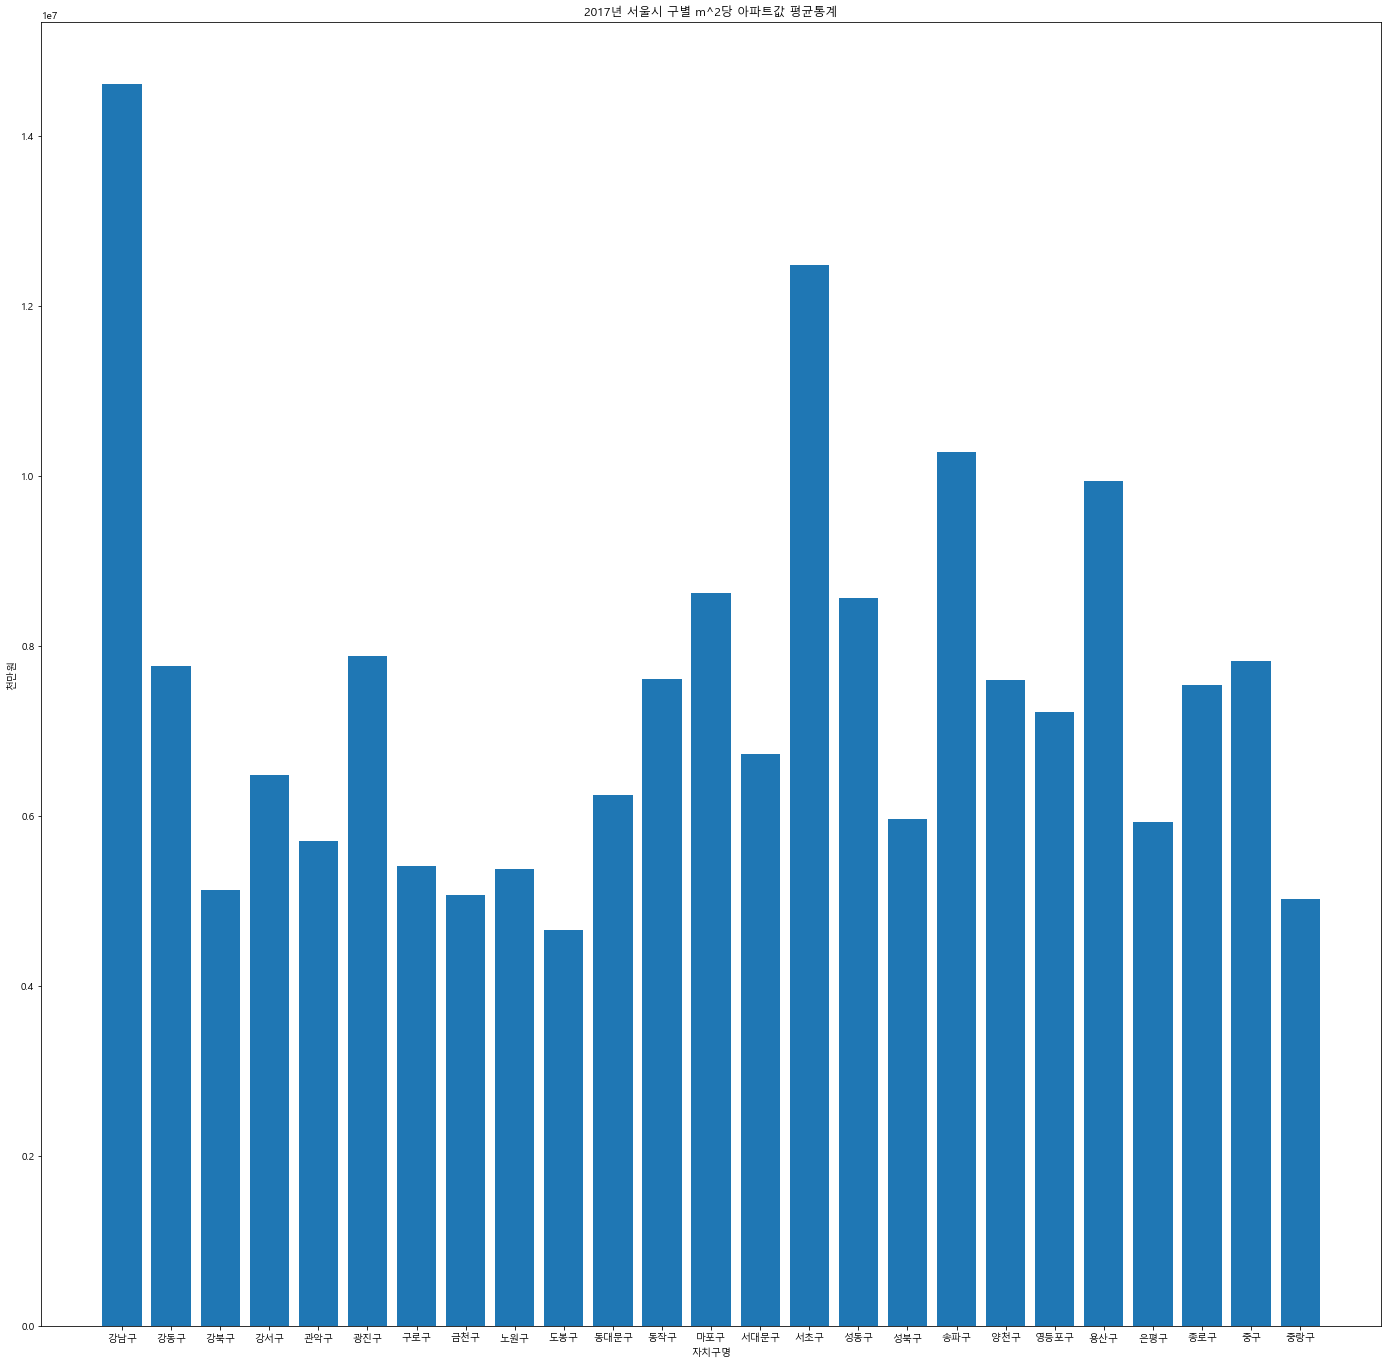

In [4]:
rcParams['figure.figsize'] = (24, 24)
plt.bar(x7, y_result7)
plt.title('2017년 서울시 구별 m^2당 아파트값 평균통계')
plt.xlabel('자치구명')
plt.ylabel('천만원')
plt.show()

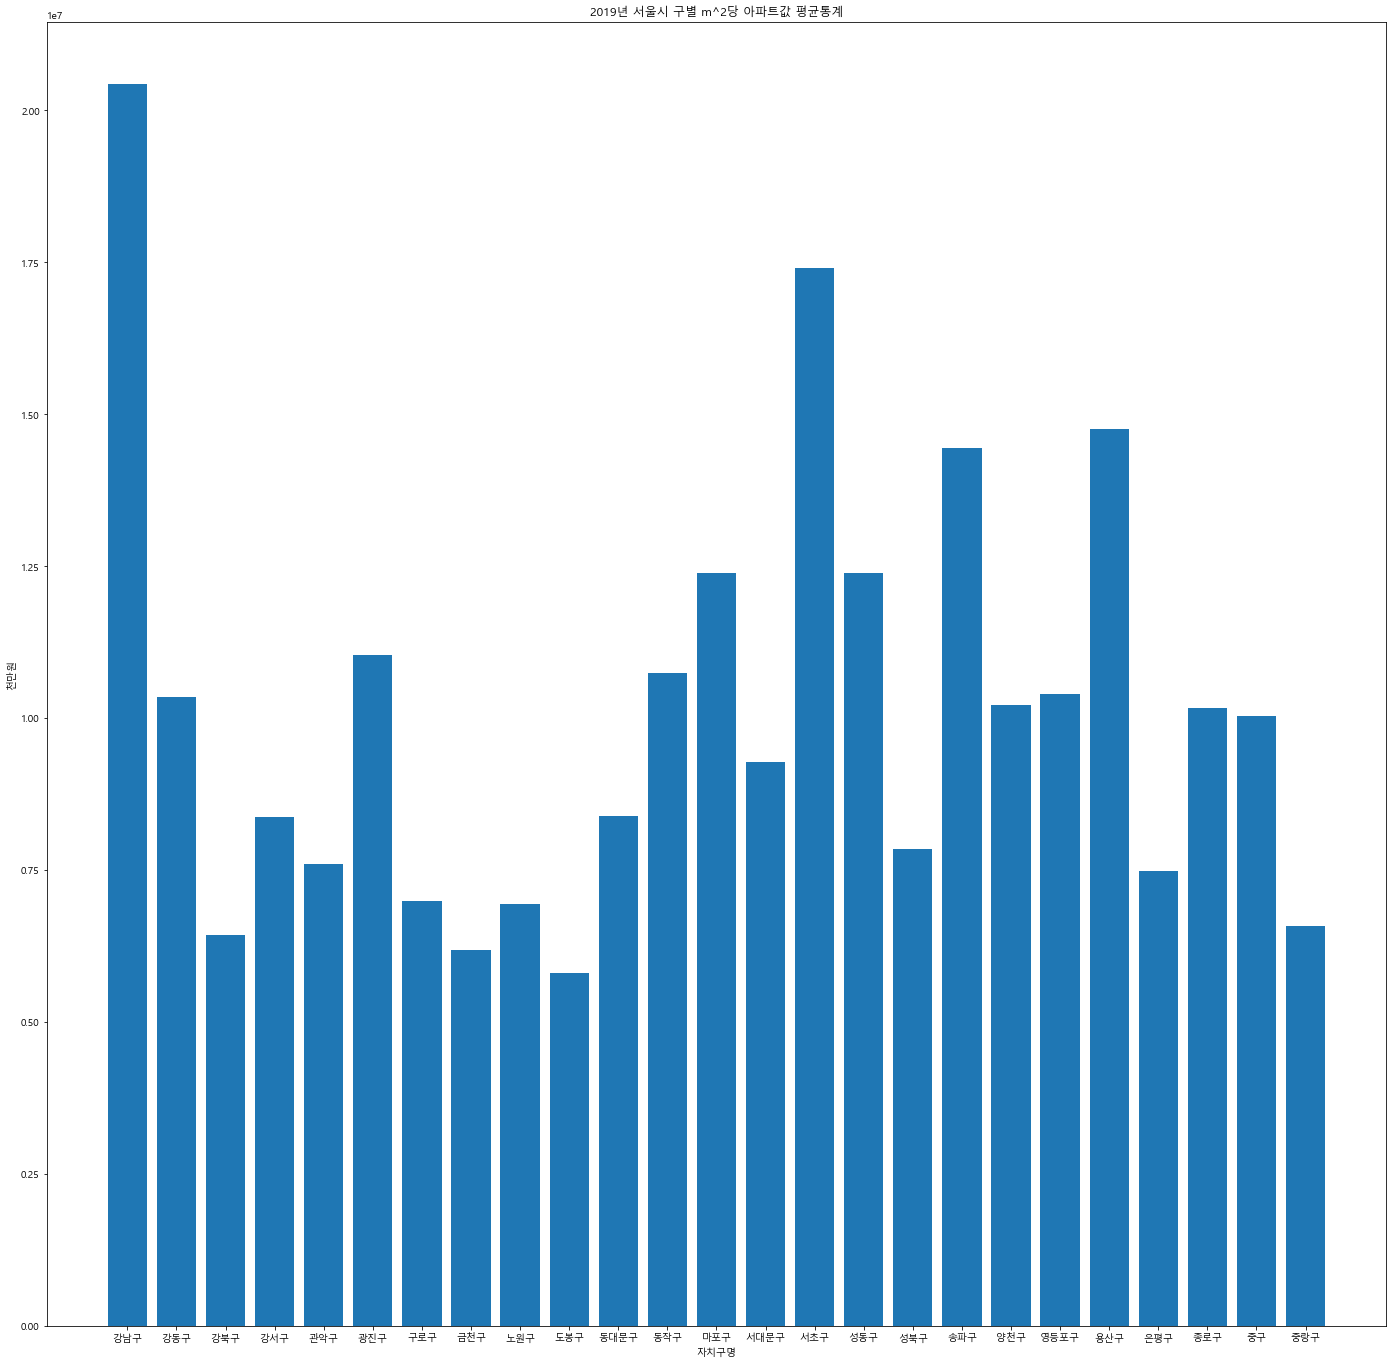

In [5]:
rcParams['figure.figsize'] = (24, 24)
plt.bar(x9, y_result9)
plt.title('2019년 서울시 구별 m^2당 아파트값 평균통계')
plt.xlabel('자치구명')
plt.ylabel('천만원')
plt.show()

In [6]:
rcParams['figure.figsize'] = (24, 24)

for i in range(len(rc)):
    a = y_result9[i]
    b = y_result7[i]
    x97.append(rc[i])
    chai.append(a - b)

plt.bar(x9, chai)
plt.title('2017년 대비 2019년 m^2당 아파트값 상승폭')
plt.xlabel('자치구명')
plt.ylabel('원')
plt.show()


In [7]:
dc = {"자치구명":x9, "1m^2당 가격 상승률":chai}
dcf = pd.DataFrame(dc)

print(dcf)

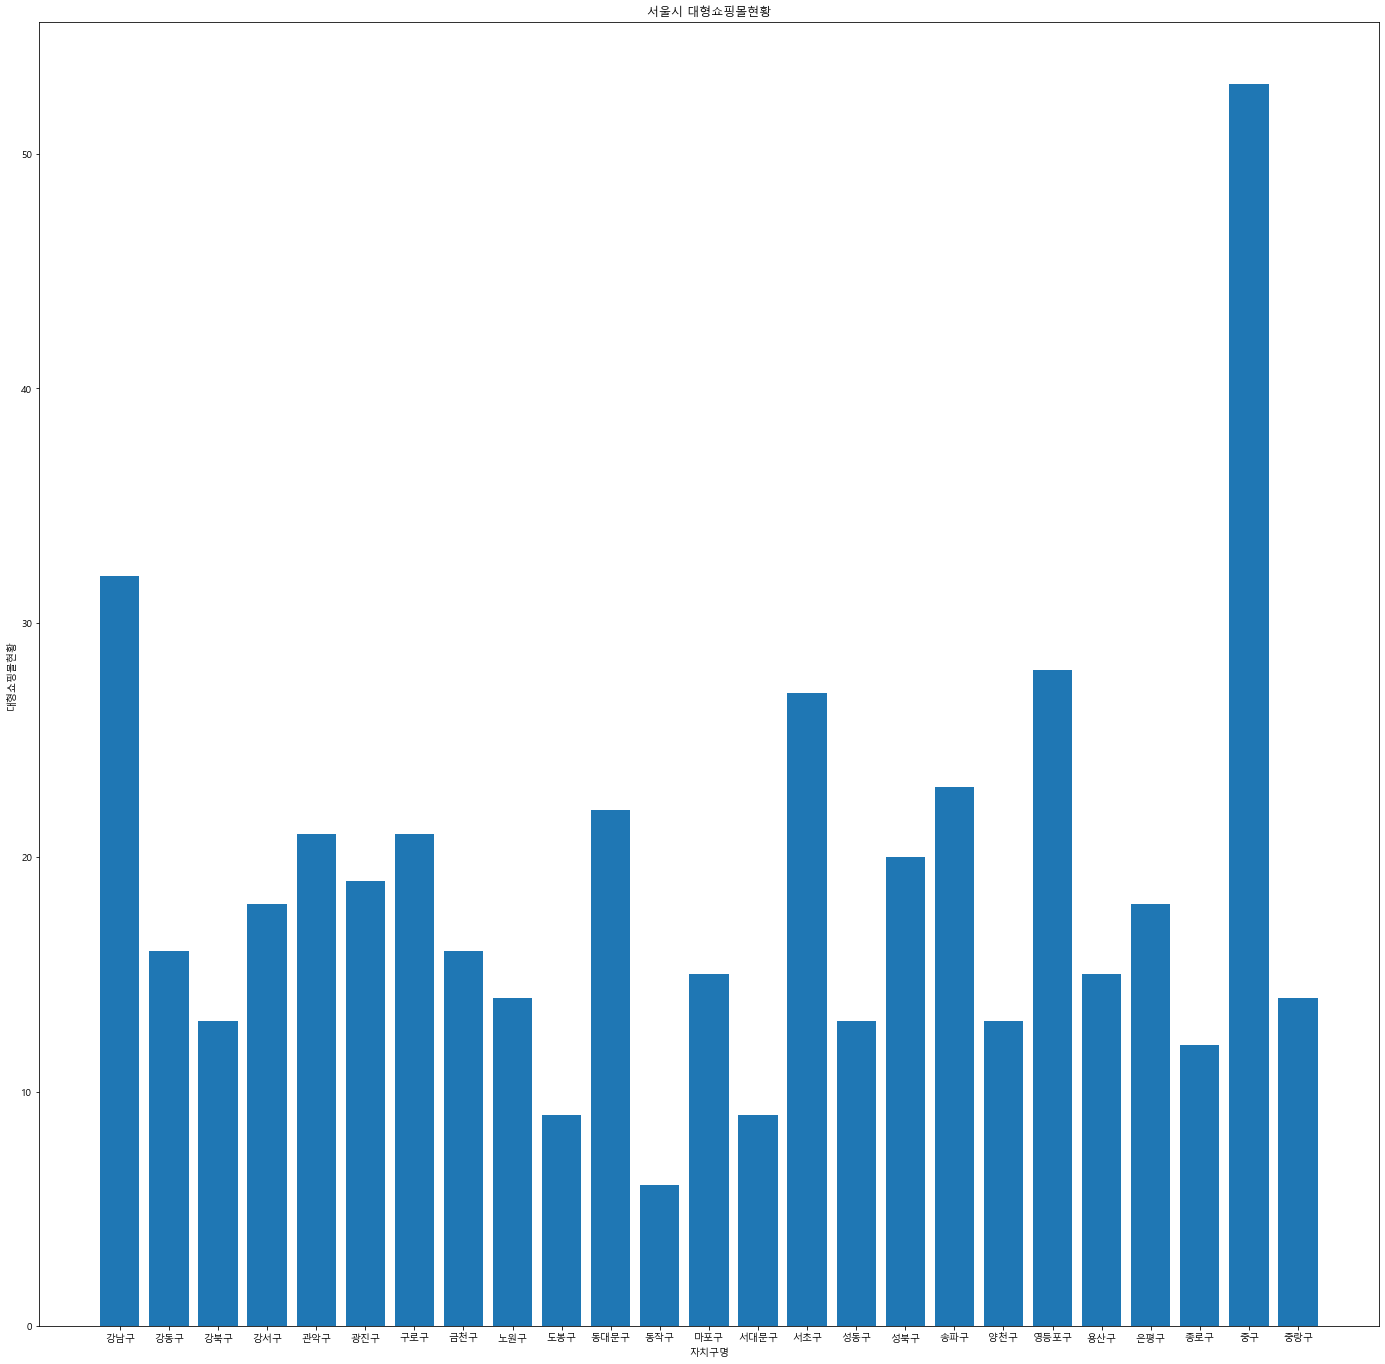

In [8]:
pdata = pd.read_excel('C:/Users/student/Desktop/seoul_project/대형마트.xls')

rcParams['figure.figsize'] = (24, 24)

xp = []

yp_result = []

for i in range(len(rc)):
    rp = pdata[pdata['자치구'].isin([rc[i]])]
    yp = rp['합계']
    yp_result.append(yp.mean())
    xp.append(rc[i])

plt.bar(xp, yp_result)
plt.title('서울시 대형쇼핑몰현황')
plt.xlabel('자치구명')
plt.ylabel('대형쇼핑몰현황')
plt.show()

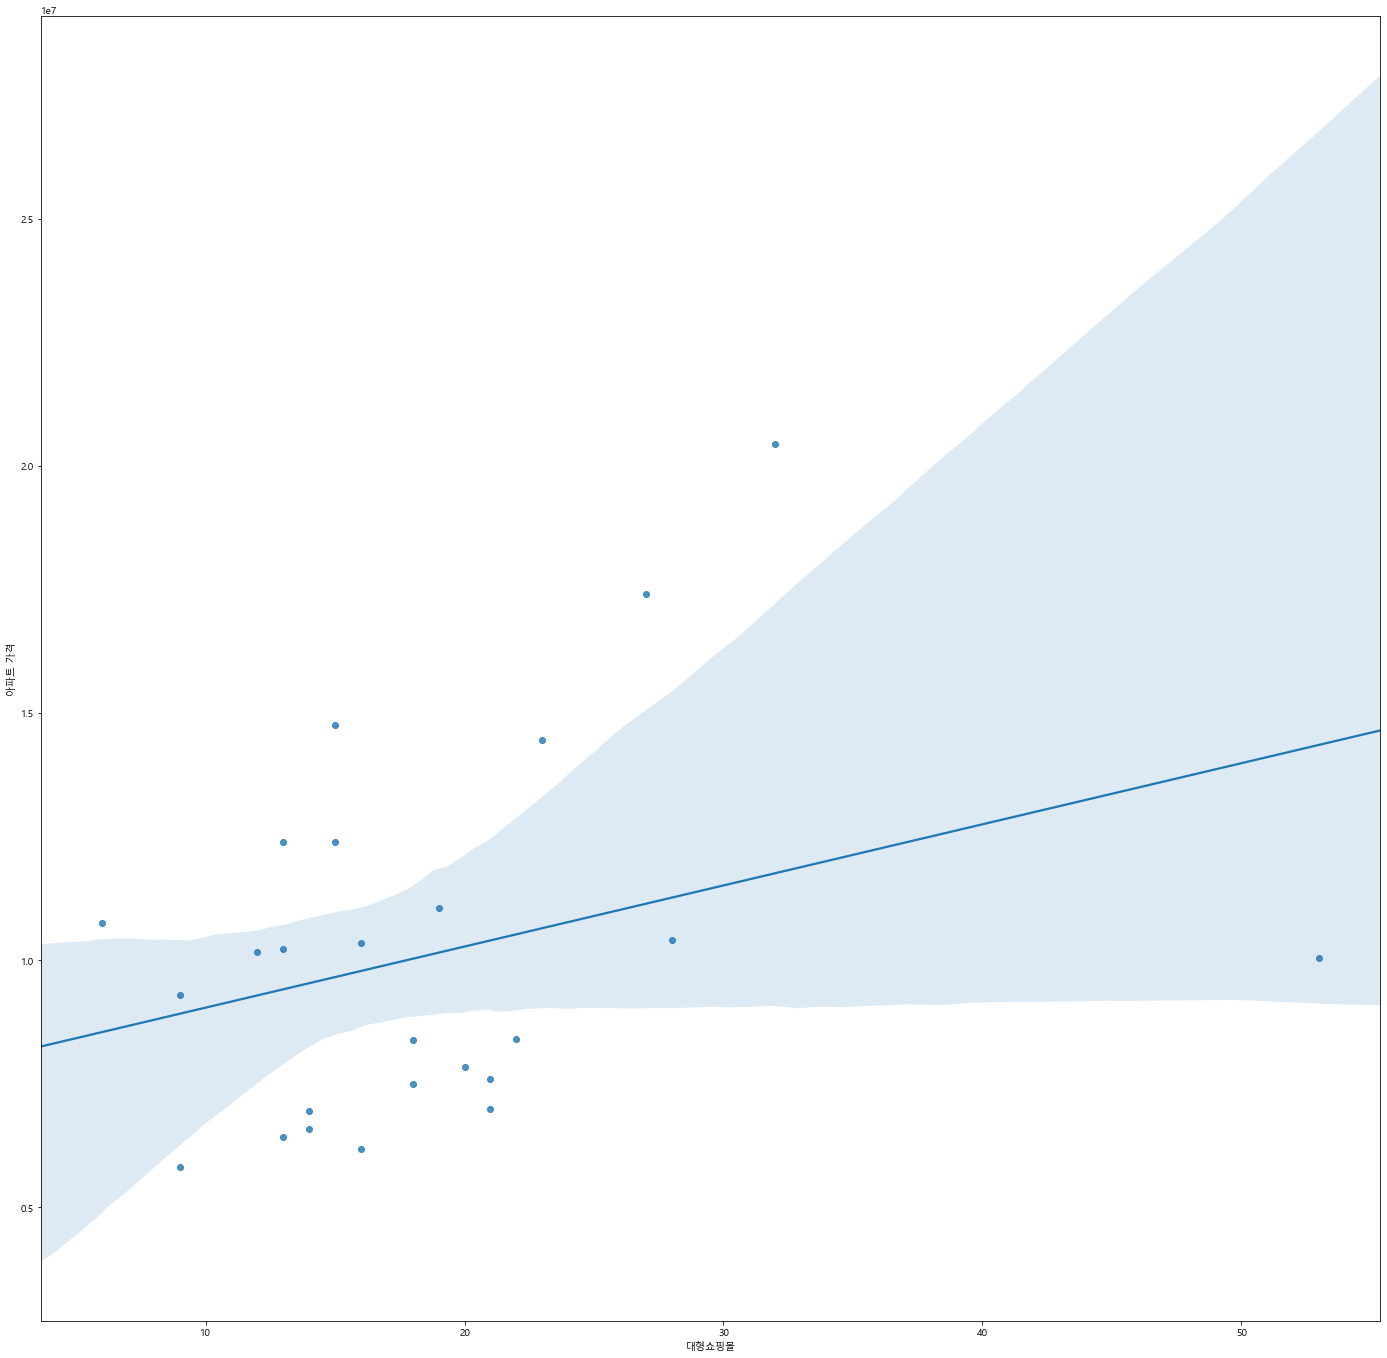

In [9]:
ds = pd.DataFrame(yp_result, xp)

d9 = pd.DataFrame(y_result9, x9)

total = pd.concat([d9, ds], axis = 1)

total.columns = ['아파트 가격', '대형쇼핑몰']

#print(total)

sns.regplot(x=total["대형쇼핑몰"], y=total["아파트 가격"])

In [10]:
sm = pd.read_excel('C:/Users/student/Desktop/seoul_project/서울시 행정구역 시군구 정보.xlsx')

ds = pd.DataFrame(sm, columns = ['순번', '시군구코드', '시군구명_한글', '시군구명_영문', 'ESRI_PK', '위도', '경도'])

ds.drop(['순번', '시군구코드', '시군구명_영문', 'ESRI_PK'], axis = 1, inplace = True)

xs = []

#print(n)
y1_result = []
y2_result = []


for i in range(len(rc)):
    rs = ds[ds['시군구명_한글'].isin([rc[i]])]
    s1 = rs['위도']
    s2 = rs['경도']
    y1_result.append(s1.mean())
    y2_result.append(s2.mean())
    xs.append(rc[i])

d1 = pd.DataFrame(y1_result, n)

d2 = pd.DataFrame(y2_result, n)

d3 = pd.DataFrame(xp, n)



ntotal = pd.concat([d1, d2], axis = 1)

ntotal.columns = ['위도', '경도']

atotal = pd.concat([d3, ntotal], axis = 1)

atotal.columns = ['자치구', '위도', '경도']
print(atotal)

##여기부터
#print(total)


     자치구         위도          경도
0    강남구  37.495985  127.066409
1    강동구  37.549208  127.146482
2    강북구  37.646995  127.014716
3    강서구  37.565762  126.822656
4    관악구  37.465399  126.943807
5    광진구  37.548144  127.085753
6    구로구  37.495486  126.858121
7    금천구  37.460097  126.900155
8    노원구  37.655264  127.077120
9    도봉구  37.665861  127.031767
10  동대문구  37.583801  127.050700
11   동작구  37.496504  126.944307
12   마포구  37.562291  126.908780
13  서대문구  37.582037  126.935667
14   서초구  37.476953  127.037810
15   성동구  37.550675  127.040962
16   성북구  37.606991  127.023218
17   송파구  37.504853  127.114482
18   양천구  37.527062  126.856153
19  영등포구  37.520641  126.913924
20   용산구  37.531101  126.981074
21   은평구  37.617612  126.922700
22   종로구  37.599100  126.986149
23    중구  37.557945  126.994190
24   중랑구  37.595379  127.093967


In [15]:
ds = pd.DataFrame(yp_result, n)

d9 = pd.DataFrame(y_result9, n)

total = pd.concat([d9, ds], axis = 1)
total.columns = ['아파트 가격', '대형쇼핑몰']
stotal = pd.concat([atotal, total], axis = 1)
#print(total.columns)

print(stotal)

seoul_map = folium.Map(lovation = [37.55, 126.98])

for name, lat, lng in zip(stotal.자치구, stotal.위도, stotal.경도):
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)
   
for item in stotal.index:
    lat = stotal.loc[item, '위도']
    long = stotal.loc[item, '경도']
    
    folium.CircleMarker([lat, long],
                        radius = stotal.loc[item, '아파트 가격']/300000,
                        popup = stotal.loc[item, '자치구'],
                        color = 'Yellow',
                        fill = True).add_to(seoul_map)
    
    folium.CircleMarker([lat, long],
                        radius = stotal.loc[item, '아파트 가격']/300000,
                        popup = [stotal.loc[item, '아파트 가격']/10000, stotal.loc[item, '대형쇼핑몰']],
                        color = 'Yellow',
                        fill = True).add_to(seoul_map)
    
seoul_map.save('C:/Users/student/Desktop/seoul.html')

     자치구         위도          경도        아파트 가격  대형쇼핑몰
0    강남구  37.495985  127.066409  2.044065e+07   32.0
1    강동구  37.549208  127.146482  1.035444e+07   16.0
2    강북구  37.646995  127.014716  6.427281e+06   13.0
3    강서구  37.565762  126.822656  8.381498e+06   18.0
4    관악구  37.465399  126.943807  7.601084e+06   21.0
5    광진구  37.548144  127.085753  1.104643e+07   19.0
6    구로구  37.495486  126.858121  6.990253e+06   21.0
7    금천구  37.460097  126.900155  6.182204e+06   16.0
8    노원구  37.655264  127.077120  6.947525e+06   14.0
9    도봉구  37.665861  127.031767  5.802720e+06    9.0
10  동대문구  37.583801  127.050700  8.397511e+06   22.0
11   동작구  37.496504  126.944307  1.074030e+07    6.0
12   마포구  37.562291  126.908780  1.239770e+07   15.0
13  서대문구  37.582037  126.935667  9.284854e+06    9.0
14   서초구  37.476953  127.037810  1.740047e+07   27.0
15   성동구  37.550675  127.040962  1.239754e+07   13.0
16   성북구  37.606991  127.023218  7.843589e+06   20.0
17   송파구  37.504853  127.114482  1.444795e+07 

In [27]:
ds = pd.DataFrame(yp_result, n)

d9 = pd.DataFrame(y_result9, n)

total = pd.concat([d9, ds], axis = 1)
total.columns = ['아파트 가격', '대형쇼핑몰']
stotal = pd.concat([atotal, total], axis = 1)
#print(total.columns)

print(stotal)

map_osm = folium.Map(location = [37.55, 126.98])

rfile = open('C:/Users/student/Desktop/seoul_project/서울경계.json', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)
folium.GeoJson(jsonData, name = '서울경계').add_to(map_osm)


for item in stotal.index:
    lat = stotal.loc[item, '위도']
    long = stotal.loc[item, '경도']
    
    folium.CircleMarker([lat, long],
                        radius = stotal.loc[item, '아파트 가격']/300000,
                        popup = stotal.loc[item, '자치구'],
                        color = 'Yellow',
                        fill = True).add_to(map_osm)
    
    folium.CircleMarker([lat, long],
                        radius = stotal.loc[item, '아파트 가격']/300000,
                        popup = [stotal.loc[item, '아파트 가격']/10000, stotal.loc[item, '대형쇼핑몰']],
                        color = 'Yellow',
                        fill = True).add_to(map_osm)
for name, lat, lng in zip(stotal.자치구, stotal.위도, stotal.경도):
    folium.Marker([lat, lng], popup = name).add_to(map_osm)
    
map_osm.save('C:/Users/student/Desktop/seoul.html')

     자치구         위도          경도        아파트 가격  대형쇼핑몰
0    강남구  37.495985  127.066409  2.044065e+07   32.0
1    강동구  37.549208  127.146482  1.035444e+07   16.0
2    강북구  37.646995  127.014716  6.427281e+06   13.0
3    강서구  37.565762  126.822656  8.381498e+06   18.0
4    관악구  37.465399  126.943807  7.601084e+06   21.0
5    광진구  37.548144  127.085753  1.104643e+07   19.0
6    구로구  37.495486  126.858121  6.990253e+06   21.0
7    금천구  37.460097  126.900155  6.182204e+06   16.0
8    노원구  37.655264  127.077120  6.947525e+06   14.0
9    도봉구  37.665861  127.031767  5.802720e+06    9.0
10  동대문구  37.583801  127.050700  8.397511e+06   22.0
11   동작구  37.496504  126.944307  1.074030e+07    6.0
12   마포구  37.562291  126.908780  1.239770e+07   15.0
13  서대문구  37.582037  126.935667  9.284854e+06    9.0
14   서초구  37.476953  127.037810  1.740047e+07   27.0
15   성동구  37.550675  127.040962  1.239754e+07   13.0
16   성북구  37.606991  127.023218  7.843589e+06   20.0
17   송파구  37.504853  127.114482  1.444795e+07 